In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import japanize_matplotlib

In [27]:
np.arange(0.478, 0.488, 0.001)

array([0.478, 0.479, 0.48 , 0.481, 0.482, 0.483, 0.484, 0.485, 0.486,
       0.487, 0.488])

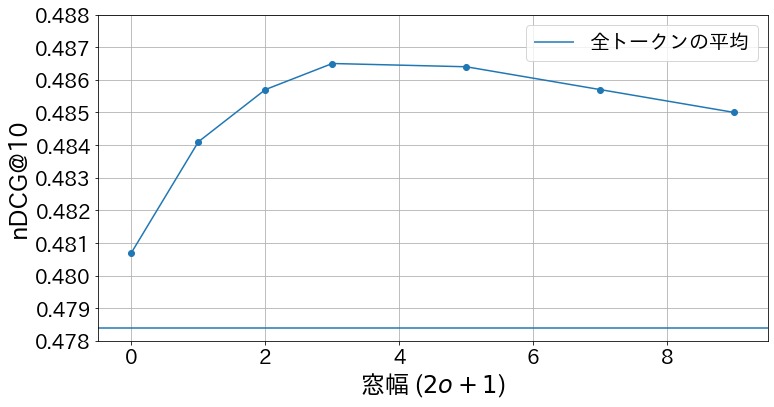

In [86]:
window_length = {0: 0.4807, 1: 0.4841, 2: 0.4857, 3: 0.4865, 5: 0.4864, 7:0.4857, 9: 0.4850}
df_wl = pd.Series(window_length)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("窓幅 ($2o+1$)", fontsize=24)
ax1.set_ylabel("nDCG@10", fontsize=24)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.plot(df_wl, marker="o")
# ax1.set_xticks(range(-1, 10))
ax1.set_xlim(-0.5, 9.5, 1)
ax1.set_ylim(0.478, 0.488)
ax1.set_yticks(np.arange(0.478, 0.488, 0.001))
ax1.grid()
ax1.hlines(0.4784, -1, 10, label="全トークンの平均")
ax1.legend(fontsize=20)
fig.savefig("fig_window_ndcg.svg", format="svg")

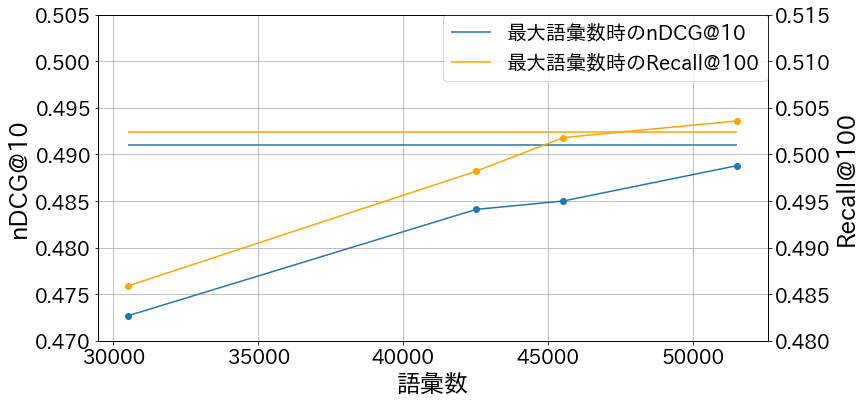

In [74]:
ndcg_vocab = {30522: 0.4727, 42522: 0.4841, 45522: 0.4850, 51522: 0.4888}
df_ndcg = pd.Series(ndcg_vocab)
recall_vocab = {30522: 0.4859, 42522: 0.4982, 45522: 0.5018, 51522: 0.5036}
df_recall = pd.Series(recall_vocab)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.set_xlabel("語彙数", fontsize=24)
ax1.set_ylabel("nDCG@10", fontsize=24)
ax2.set_ylabel("Recall@100", fontsize=24)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax2.tick_params(axis="y", labelsize=20)
ax1.plot(df_ndcg, marker="o")
ax2.plot(df_recall, marker="o", color="orange")
ax1.set_ylim(0.470, 0.500)
ax1.set_yticks(np.arange(0.470, 0.505, 0.005))
ax2.set_ylim(0.480, 0.510)
ax2.set_yticks(np.arange(0.480, 0.515, 0.005))
ax1.grid()
ax1.hlines(0.4910, 30522, 51522, label="最大語彙数時のnDCG@10")
ax2.hlines(0.5024, 30522, 51522, label="最大語彙数時のRecall@100", color="orange")
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1+handler2,label1+label2,borderaxespad=0,fontsize=20)
fig.savefig("fig_vocab_performance.svg", format="svg")

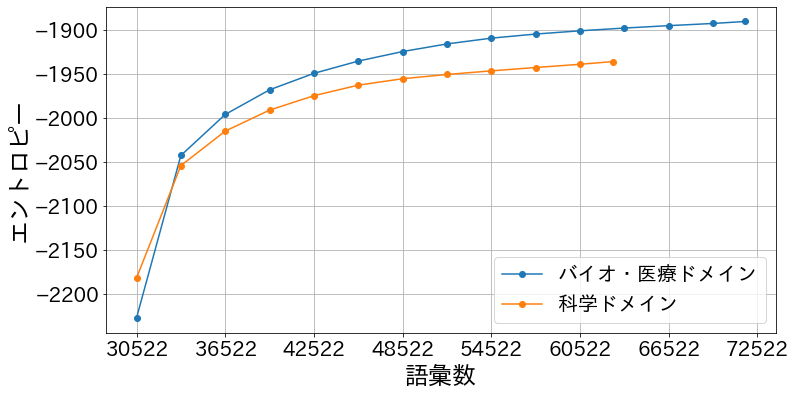

In [97]:
bio_vocab_ent = {30522: -2227.7853, 33522: -2043.0048, 36522: -1996.3549, 
              39522: -1968.32037, 42522: -1949.608227, 45522: -1935.649672,
              48522: -1924.809109, 51522: -1916.139076, 54522: -1909.569817,
              57522: -1904.903537, 60522: -1901.217073, 63522: -1898.097179,
              66522: -1895.360061, 69522: -1892.872604, 71694: -1890.599996}

df_bio_vocab_ent = pd.Series(bio_vocab_ent)

sci_vocab_ent = {30522: -2182.342875, 33522: -2054.513975, 36522: -2015.313672,
                 39522: -1991.416775, 42522: -1975.023157, 45522: -1963.004914,
                 48522: -1955.712362, 51522: -1950.88016, 54522: -1946.77616,
                 57522: -1942.951819, 60522: -1939.284951, 62783: -1936.132221}
df_sci_vocab_ent = pd.Series(sci_vocab_ent)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("語彙数", fontsize=24)
ax1.set_xticks(np.arange(30522, 73522, 6000))
ax1.set_ylabel("エントロピー", fontsize=24)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.plot(df_bio_vocab_ent, marker="o", label="バイオ・医療ドメイン")
ax1.plot(df_sci_vocab_ent, marker="o", label="科学ドメイン")
# ax1.set_xticks(range(-1, 10))
ax1.grid()
ax1.legend(fontsize=20)
fig.savefig("fig_vocab_entropy.svg", format="svg")